<a href="https://colab.research.google.com/github/RobertTalbert/discretecs/blob/master/MTH325-Fall2024/course-docs/networkX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

## Web resources for networkX

https://networkx.org/

https://networkx.org/documentation/stable/tutorial.html

## Creating graphs


In [2]:
# By creating an empty graph and adding edges one at a time
G = nx.Graph()
G.add_edge('A', 'B')
G.add_edge('B', 'C')
G.add_edge('C', 'D')

# Adding new nodes one at a time
G.add_node('E')
G.add_node('F')

# Adding a list of nodes
G.add_nodes_from(['G', 'H'])

# Adding new edges one at a time
G.add_edge('E', 'F')
G.add_edge('F', 'G')
G.add_edge('G', 'H')

# Adding a list of new edges
G.add_edges_from([('H', 'A'), ('H', 'B')])

In [3]:
# By creating an empty graph and adding edges using a list
my_edges = [('A', 'B'), ('B', 'C'), ('C', 'D')]
G = nx.Graph()
G.add_edges_from(my_edges)

# Or creating the graph directly from an edge list
G = nx.Graph([('A', 'B'), ('B', 'C'), ('C', 'D')])

In [4]:
# By setting up a dictionary and creating the graph from it
my_dict = {'A': ['B', 'C'], 'B': ['C', 'D'], 'C': ['D']}
G = nx.Graph(my_dict)

In [5]:
# By creating a random graph with a specified number of nodes and edges
G = nx.gnm_random_graph(10, 20)

# By creating a random graph with a specified number of nodes and a
# probability of connection
# This makes a graph with 10 vertices, and there is a 0.3 probability that
# a pair of vertices is adjacent
G = nx.gnp_random_graph(10, 0.3)

## Visualizing graphs

In [6]:
# Use this graph for the following examples
G = nx.gnp_random_graph(10, 0.6)

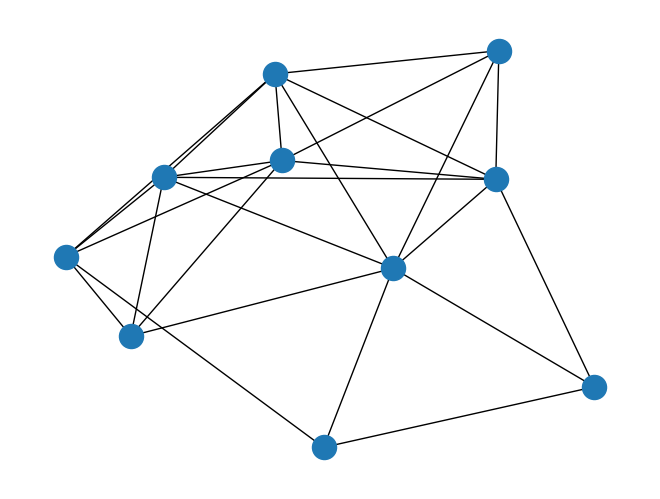

In [7]:
# Basic move:
nx.draw(G)

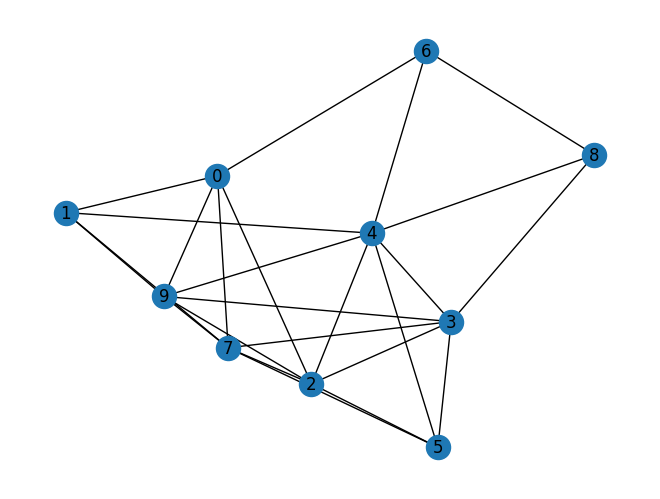

In [8]:
# Adding vertex labels
nx.draw(G, with_labels=True)

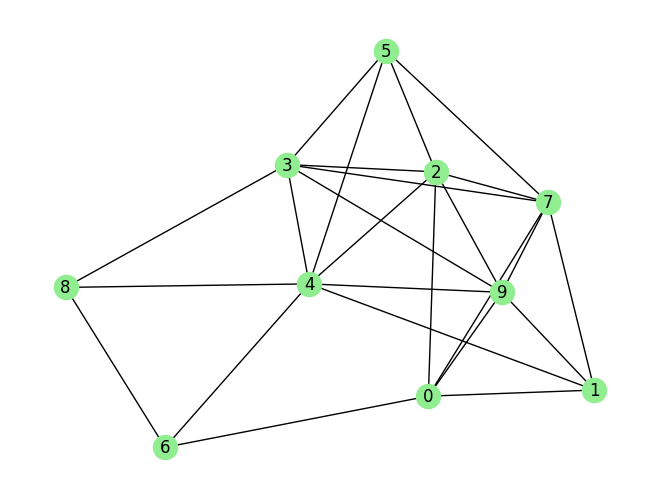

In [9]:
# Vertex labels with light green vertex coloring
nx.draw(G, with_labels=True, node_color='lightgreen')

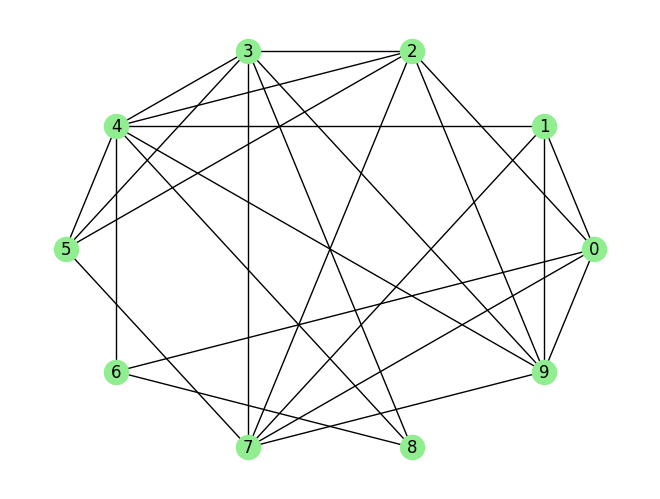

In [10]:
# Putting the graph in a circular layout to (somewhat) improve readability
nx.draw(G, pos=nx.circular_layout(G), with_labels=True, node_color='lightgreen')

## Special graphs

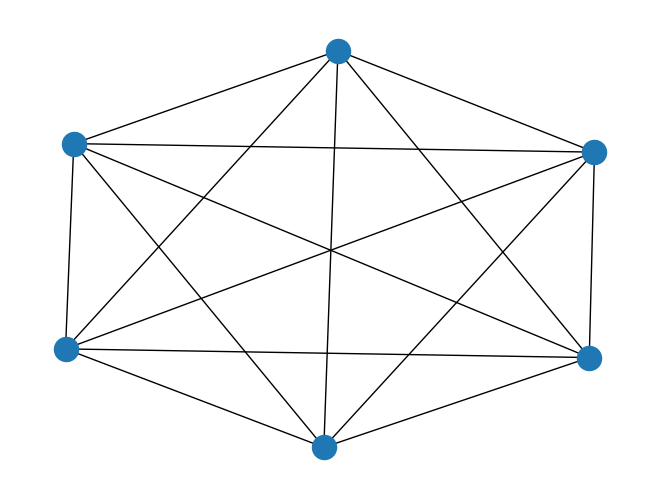

In [11]:
# Complete graph
nx.draw(nx.complete_graph(6))

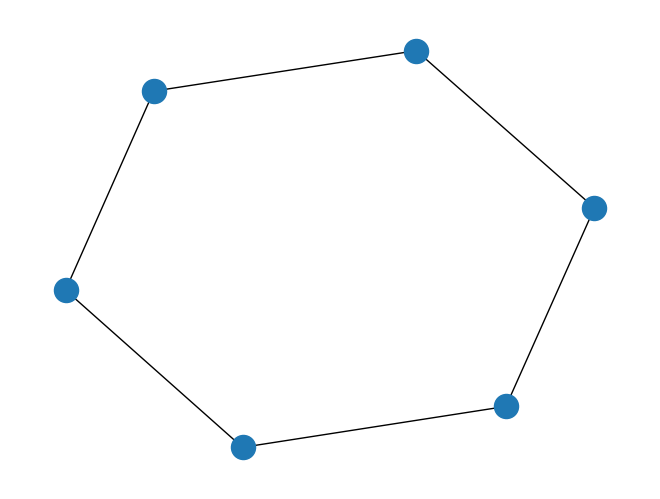

In [12]:
# Cycle graph
nx.draw(nx.cycle_graph(6))

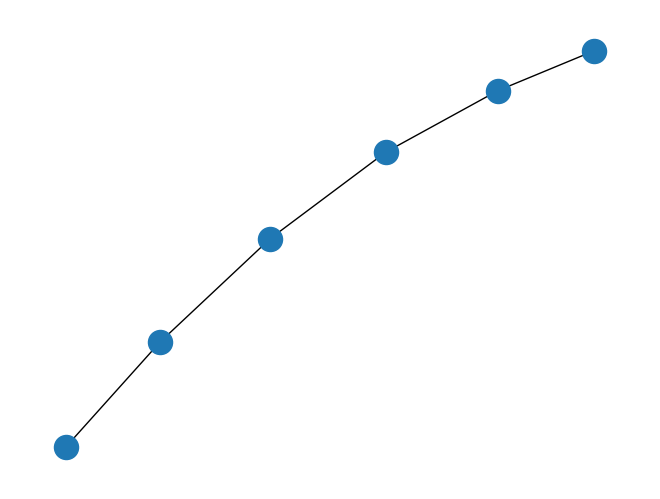

In [13]:
# Path graph
nx.draw(nx.path_graph(6))

## Getting information about graphs

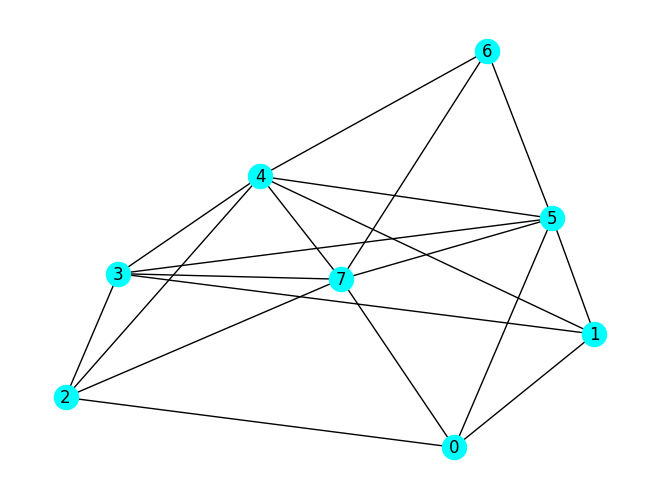

In [14]:
# Sample graph for examples
G = nx.gnp_random_graph(8, 0.6)
nx.draw(G, with_labels=True, node_color='cyan')

In [15]:
# Number of edges and vertices
G.number_of_edges(), G.number_of_nodes()

(19, 8)

In [16]:
# Degree sequence
# This does not actually return the degree sequence, but a list that shows
# each vertex paired up with its degree.
list(G.degree())

[(0, 4), (1, 4), (2, 4), (3, 5), (4, 6), (5, 6), (6, 3), (7, 6)]

In [17]:
# We can do some Python to get the real degree sequence:
degree_sequence = [d for n, d in G.degree()]
degree_sequence.sort(reverse=True)
print(degree_sequence)

[6, 6, 6, 5, 4, 4, 4, 3]


## Converting representations

In [18]:
# Start with another instance
G = nx.gnp_random_graph(8, 0.6)

In [19]:
# Convert to dictionary
nx.to_dict_of_lists(G)

{0: [1, 2, 3, 4, 7],
 1: [0, 2, 3, 4, 5],
 2: [0, 1, 3],
 3: [0, 1, 2, 4, 5],
 4: [0, 1, 3, 5],
 5: [1, 3, 4],
 6: [],
 7: [0]}

In [20]:
# Convert to edge list
# The results are weird...
nx.to_edgelist(G)

EdgeDataView([(0, 1, {}), (0, 2, {}), (0, 3, {}), (0, 4, {}), (0, 7, {}), (1, 2, {}), (1, 3, {}), (1, 4, {}), (1, 5, {}), (2, 3, {}), (3, 4, {}), (3, 5, {}), (4, 5, {})])

In [21]:
# The empty braces are there in case we want to add information to the edges.
# For a plain edge list, a quick list comprehension will work:
[(a,b) for (a,b,x) in nx.to_edgelist(G)]

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 7),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (2, 3),
 (3, 4),
 (3, 5),
 (4, 5)]